<a href="https://colab.research.google.com/github/rohit131991/WebMining/blob/main/Modulele-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import requests
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt

In [42]:
df = web.DataReader('GOOG', data_source='yahoo', start='2016-01-01', end='2020-12-31')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,744.059998,731.257996,743.000000,741.840027,3272800,741.840027
2016-01-05,752.000000,738.640015,746.450012,742.580017,1950700,742.580017
2016-01-06,747.179993,728.919983,730.000000,743.619995,1947000,743.619995
2016-01-07,738.500000,719.059998,730.309998,726.390015,2963700,726.390015
2016-01-08,733.229980,713.000000,731.450012,714.469971,2450900,714.469971
...,...,...,...,...,...,...
2020-12-24,1746.000000,1729.109985,1735.000000,1738.849976,346800,1738.849976
2020-12-28,1790.728027,1746.334961,1751.635010,1776.089966,1393000,1776.089966
2020-12-29,1792.439941,1756.089966,1787.790039,1758.719971,1299400,1758.719971


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2016-01-04 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1259 non-null   float64
 1   Low        1259 non-null   float64
 2   Open       1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Volume     1259 non-null   int64  
 5   Adj Close  1259 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


In [ ]:
df.shape

(1259, 6)

In [46]:
df.head(10)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,744.059998,731.257996,743.000000,741.840027,3272800,741.840027
2016-01-05,752.000000,738.640015,746.450012,742.580017,1950700,742.580017
2016-01-06,747.179993,728.919983,730.000000,743.619995,1947000,743.619995
2016-01-07,738.500000,719.059998,730.309998,726.390015,2963700,726.390015
2016-01-08,733.229980,713.000000,731.450012,714.469971,2450900,714.469971
2016-01-11,718.854980,703.539978,716.609985,716.030029,2090600,716.030029
2016-01-12,728.750000,717.317017,721.679993,726.070007,2024500,726.070007
2016-01-13,734.739990,698.609985,730.849976,700.559998,2501700,700.559998
2016-01-14,721.924988,689.099976,705.380005,714.719971,2225800,714.719971


#Time-Series Analysis 

In [48]:
close = df['Close']

In [49]:
close.describe()

count    1259.000000
mean     1090.083688
std       269.099996
min       668.260010
25%       836.994995
50%      1082.760010
75%      1230.540039
max      1827.989990
Name: Close, dtype: float64

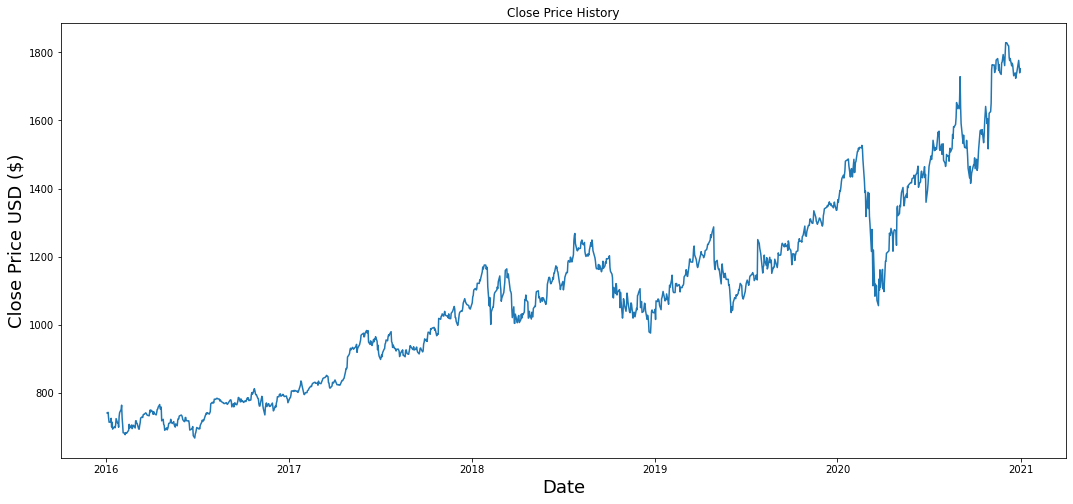

In [50]:
plt.figure(figsize=(18,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


In [7]:
import json
import re
import csv
import requests
from bs4 import BeautifulSoup

In [2]:
url_financials = 'https://finance.yahoo.com/quote/GOOG/financials?p=GOOG'

In [5]:
response = requests.get(url_financials)

In [12]:
soup = BeautifulSoup(response.text, 'html.parser')

In [13]:
pattern = re.compile(r'\s--\sData\s--\s')
script_data = soup.find('script', text=pattern).contents[0]

In [14]:
script_data[:500]

'\n(function (root) {\n/* -- Data -- */\nroot.App || (root.App = {});\nroot.App.now = 1612400939974;\nroot.App.main = {"context":{"dispatcher":{"stores":{"PageStore":{"currentPageName":"quote","currentEvent":{"eventName":"NEW_PAGE_SUCCESS"},"currentRenderTargetId":"default","pagesConfigRaw":{"base":{"quote":{"layout":{"bundleName":"yahoodotcom-layout.TwoColumnLayout","name":"TwoColumnLayout","config":{"enableHeaderCollapse":true,"additionalBodyWrapperClasses":"Bgc($layoutBgColor)!","contentWrapperClas'

In [15]:
script_data[-500:]

'put":{"strings":1},"tdv2-applet-sponsored-moments":{"strings":1},"tdv2-applet-stream":{"strings":1},"tdv2-applet-stream-hero":{"strings":1},"tdv2-applet-swisschamp":{"strings":1},"tdv2-applet-uh":{"strings":1},"tdv2-applet-userintent":{"strings":1},"tdv2-applet-video-lightbox":{"strings":1},"tdv2-applet-video-modal":{"strings":1},"tdv2-wafer-adfeedback":{"strings":1},"tdv2-wafer-header":{"strings":1},"yahoodotcom-layout":{"strings":1}}},"options":{"defaultBundle":"td-app-finance"}}}};\n}(this));\n'

In [16]:
start = script_data.find("context")-2

In [17]:
json_data = json.loads(script_data[start:-12])

In [18]:
json_data['context'].keys()

dict_keys(['dispatcher', 'options', 'plugins'])

In [19]:
json_data['context']['dispatcher']['stores']['QuoteSummaryStore'].keys()

dict_keys(['financialsTemplate', 'cashflowStatementHistory', 'balanceSheetHistoryQuarterly', 'earnings', 'price', 'incomeStatementHistoryQuarterly', 'incomeStatementHistory', 'balanceSheetHistory', 'cashflowStatementHistoryQuarterly', 'quoteType', 'summaryDetail', 'symbol', 'pageViews'])

In [29]:
annual_is = json_data['context']['dispatcher']['stores']['QuoteSummaryStore']['incomeStatementHistory']['incomeStatementHistory']

In [30]:
print(annual_is[0])

{'researchDevelopment': {'raw': 26018000000, 'fmt': '26.02B', 'longFmt': '26,018,000,000'}, 'effectOfAccountingCharges': {}, 'incomeBeforeTax': {'raw': 39625000000, 'fmt': '39.62B', 'longFmt': '39,625,000,000'}, 'minorityInterest': {}, 'netIncome': {'raw': 34343000000, 'fmt': '34.34B', 'longFmt': '34,343,000,000'}, 'sellingGeneralAdministrative': {'raw': 27461000000, 'fmt': '27.46B', 'longFmt': '27,461,000,000'}, 'grossProfit': {'raw': 89961000000, 'fmt': '89.96B', 'longFmt': '89,961,000,000'}, 'ebit': {'raw': 36482000000, 'fmt': '36.48B', 'longFmt': '36,482,000,000'}, 'endDate': {'raw': 1577750400, 'fmt': '2019-12-31'}, 'operatingIncome': {'raw': 36482000000, 'fmt': '36.48B', 'longFmt': '36,482,000,000'}, 'otherOperatingExpenses': {}, 'interestExpense': {'raw': -100000000, 'fmt': '-100M', 'longFmt': '-100,000,000'}, 'extraordinaryItems': {}, 'nonRecurring': {}, 'otherItems': {}, 'incomeTaxExpense': {'raw': 5282000000, 'fmt': '5.28B', 'longFmt': '5,282,000,000'}, 'totalRevenue': {'raw'

In [31]:
annual_is[0]['operatingIncome']

{'fmt': '36.48B', 'longFmt': '36,482,000,000', 'raw': 36482000000}

In [32]:
annual_is_stmts = []

for s in annual_is:
  statement = {}
  for key, val in s.items():
    try:
      statement[key] = val['raw']
    except TypeError:
      continue
    except KeyError:
      continue
  annual_is_stmts.append(statement)

In [33]:
annual_is_stmts[0]

{'costOfRevenue': 71896000000,
 'ebit': 36482000000,
 'endDate': 1577750400,
 'grossProfit': 89961000000,
 'incomeBeforeTax': 39625000000,
 'incomeTaxExpense': 5282000000,
 'interestExpense': -100000000,
 'netIncome': 34343000000,
 'netIncomeApplicableToCommonShares': 34343000000,
 'netIncomeFromContinuingOps': 34343000000,
 'operatingIncome': 36482000000,
 'researchDevelopment': 26018000000,
 'sellingGeneralAdministrative': 27461000000,
 'totalOperatingExpenses': 125375000000,
 'totalOtherIncomeExpenseNet': 3143000000,
 'totalRevenue': 161857000000}